In [11]:
import pandas as pd
import seaborn as sns
import re 
from glob import glob
import matplotlib.pyplot as plt

from sklearn import metrics
from matplotlib.dates import DateFormatter

In [284]:
def config_by_filename(f):
    exptype = "tsfresh" if "tsfresh" in f else "raw"
    p = re.compile("(\d+)min_")
    m = p.search(f)
    winsize = m.group(1)
    winconfig = "notcentered" if "notcentered" in f else "centered"
    
    return exptype, winsize, winconfig

In [285]:
files = glob("./pytorch/final*")
len(files)

36

In [437]:
dfs = []
for f in files:
    df_tmp = pd.read_csv(f)
    row = df_tmp.sort_values(by="mcc_main_y", ascending=False).head(1)
    
    exptype, winsize, winconfig = config_by_filename(f)
    row["exptype"] = exptype
    row["winsize"] = winsize
    row["winconfig"] = winconfig
    
    dfs.append(row)

df = pd.concat(dfs)
#df = pd.read_csv("./all_results_expexp_manyTo1_raw_trials50.csv")

df["featset"] = df["featset"].replace({"raw": "Raw", "tsfresh": "Processed"})
df["heads"] = df["heads"].replace({"manyheads": "5 Heads", "onehead": "1 Head", "twoheads": "2 Heads"})

df["winconfig"] = df["winconfig"].replace({"centered": "Center of the Window", "notcentered": "End of the Window"})
df["wincomb"] = df[["winconfig", "winsize"]].apply(lambda x: x[0] + "\n" + x[1] + " epochs", axis=1)
df["wincombfull"] = df[["winconfig", "winsize", "featset"]].apply(lambda x: x[2]+ " features \n" + x[0] + "\n" + x[1] + " epochs", axis=1)

In [438]:
# to see all of the columns
pd.set_option('display.max_columns', None)

In [439]:
df = df.sort_values("mcc_main_y", ascending=False).reset_index(drop=True)
df

,Unnamed: 0,main_y_loss,percentage_y_loss,loss,acc_main_y,prec_main_y,rec_main_y,f1_main_y,mcc_main_y,MAE_percentage_y,MSE_percentage_y,r2_percentage_y,heads,win,featset,exp_name,exptype,winsize,winconfig,all_awake_loss,all_sleep_loss,is_transition_loss,acc_all_awake,prec_all_awake,rec_all_awake,f1_all_awake,mcc_all_awake,acc_all_sleep,prec_all_sleep,rec_all_sleep,f1_all_sleep,mcc_all_sleep,acc_is_transition,prec_is_transition,rec_is_transition,f1_is_transition,mcc_is_transition,wincomb,wincombfull
0,0,0.279836,0.054960,0.288300,0.890064,0.905200,0.952938,0.886793,0.696155,0.161213,0.054960,0.615093,5 Heads,40min_centered,Processed,exp_manyheads_tsfresh_40min_centered_n20,tsfresh,40,Center of the Window,0.226212,0.402700,0.475863,0.916980,0.799571,0.573713,0.911129,0.633289,0.817306,0.802798,0.892383,0.815181,0.629046,0.781258,0.670099,0.511052,0.771714,0.442912,Center of the Window\n40 epochs,Processed features \nCenter of the Window\n40 ...
1,3,0.307158,0.076083,0.284884,0.882912,0.893476,0.953218,0.878994,0.691150,0.213482,0.076082,0.545267,5 Heads,20min_centered,Processed,exp_manyheads_tsfresh_20min_centered_n20,tsfresh,20,Center of the Window,0.265623,0.370948,0.399395,0.891633,0.857538,0.534812,0.881444,0.622022,0.844423,0.830308,0.944663,0.839284,0.663921,0.821915,0.000000,0.000000,0.741576,0.000000,Center of the Window\n20 epochs,Processed features \nCenter of the Window\n20 ...
2,3,0.282852,0.054049,0.188215,0.888495,0.897872,0.960268,0.883934,0.689559,0.148549,0.054049,0.621471,2 Heads,40min_centered,Processed,exp_twoheads_tsfresh_40min_centered_n20,tsfresh,40,Center of the Window,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Center of the Window\n40 epochs,Processed features \nCenter of the Window\n40 ...
3,4,0.293385,NaN,0.293385,0.882486,0.890793,0.956215,0.878096,0.689426,NaN,NaN,NaN,1 Head,20min_centered,Processed,exp_onehead_tsfresh_20min_centered_n20,tsfresh,20,Center of the Window,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Center of the Window\n20 epochs,Processed features \nCenter of the Window\n20 ...
4,8,0.285265,NaN,0.285265,0.886692,0.904712,0.948538,0.883629,0.687374,NaN,NaN,NaN,1 Head,40min_centered,Processed,exp_onehead_tsfresh_40min_centered_n20,tsfresh,40,Center of the Window,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Center of the Window\n40 epochs,Processed features \nCenter of the Window\n40 ...
5,0,0.289539,0.059313,0.294702,0.887267,0.900263,0.955230,0.883301,0.687036,0.169155,0.059313,0.584605,5 Heads,40min_centered,Raw,exp_manyheads_raw_40min_centered_n20,raw,40,Center of the Window,0.221527,0.422653,0.480777,0.913550,0.787446,0.556582,0.907179,0.616355,0.813554,0.787337,0.913094,0.809948,0.624368,0.784133,0.706756,0.460079,0.768673,0.439961,Center of the Window\n40 epochs,Raw features \nCenter of the Window\n40 epochs
6,9,0.297383,0.068317,0.202306,0.880432,0.892721,0.950381,0.876588,0.684664,0.182443,0.068317,0.591681,2 Heads,20min_centered,Processed,exp_twoheads_tsfresh_20min_centered_n20,tsfresh,20,Center of the Window,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Center of the Window\n20 epochs,Processed features \nCenter of the Window\n20 ...
7,2,0.296355,NaN,0.296355,0.885366,0.900082,0.952613,0.881538,0.682013,NaN,NaN,NaN,1 Head,40min_centered,Raw,exp_onehead_raw_40min_centered_n20,raw,40,Center of the Window,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Center of the Window\n40 epochs,Raw features \nCenter of the Window\n40 epochs
8,0,0.303949,0.056912,0.106093,0.882531,0.899309,0.949371,0.878814,0.674402,0.168028,0.056912,0.601419,2 Heads,40min_centered,Raw,exp_twoheads_raw_40min_centered_n20,raw,40,Center of the Window,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Center of the Window\n40 epochs,Raw features \nCenter of the Window\n40 epochs
9,1,0.307717,NaN,0.307717,0.875126,0.893664,0.942439,0.871647,0.666264,NaN,NaN,NaN

# MCC comparision for NNs

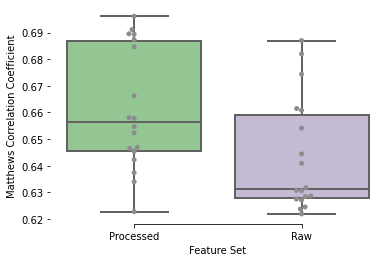

In [440]:
# TSFRESH Vs RAW
ax =  sns.boxplot(data=df, y="mcc_main_y", x="featset", linewidth=2, palette="Accent")
ax = sns.swarmplot(data=df, y="mcc_main_y", x="featset", color=".55")

# Add some transparence
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))

# Tweak the visual presentation
ax.set(ylabel="Matthews Correlation Coefficient")
ax.set(xlabel="Feature Set")
sns.despine(trim=True, left=True)


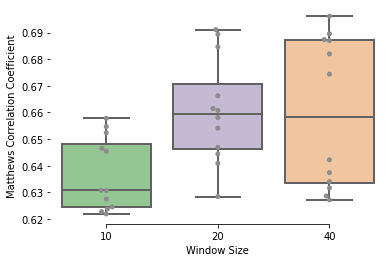

In [441]:
ax = sns.boxplot(data=df, y="mcc_main_y", x="winsize", linewidth=2, palette="Accent", order=['10', '20', '40'])
ax = sns.swarmplot(data=df, y="mcc_main_y", x="winsize", color=".55", order=['10', '20', '40'])

# Add some transparence
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))

# Tweak the visual presentation
ax.set(ylabel="Matthews Correlation Coefficient")
ax.set(xlabel="Window Size")
sns.despine(trim=True, left=True)


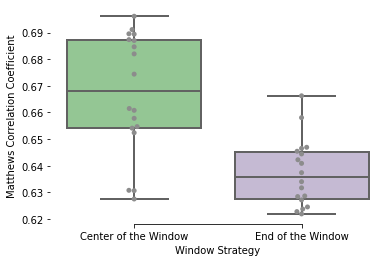

In [442]:
ax = sns.boxplot(data=df, y="mcc_main_y", x="winconfig", linewidth=2, palette="Accent")
ax = sns.swarmplot(data=df, y="mcc_main_y", x="winconfig", color=".55")

# Add some transparence
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))

# Tweak the visual presentation
ax.set(ylabel="Matthews Correlation Coefficient")
ax.set(xlabel="Window Strategy")
sns.despine(trim=True, left=True)


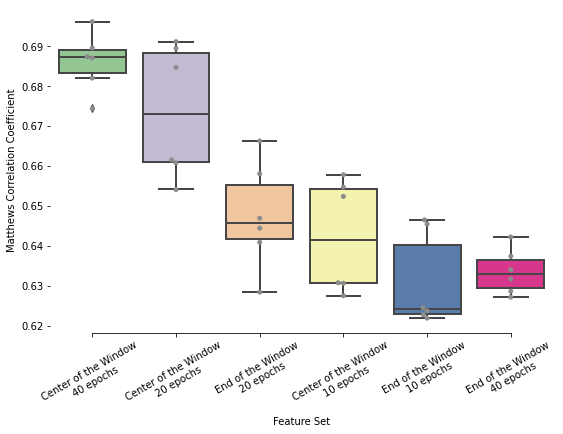

In [443]:
plt.figure(figsize=(9,6))

ax = sns.boxplot(data=df, y="mcc_main_y", x="wincomb", linewidth=2, palette="Accent")
ax = sns.swarmplot(data=df, y="mcc_main_y", x="wincomb", color=".55")


ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

# Add some transparence
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))

# Tweak the visual presentation
ax.set(ylabel="Matthews Correlation Coefficient")
ax.set(xlabel="Feature Set")
sns.despine(trim=True, left=True)


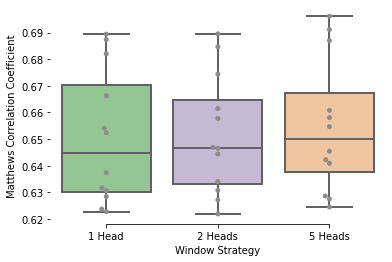

In [446]:

ax = sns.boxplot(data=df, y="mcc_main_y", x="heads", linewidth=2, palette="Accent", order=["1 Head", "2 Heads", "5 Heads"])
ax = sns.swarmplot(data=df, y="mcc_main_y", x="heads", color=".55", order=["1 Head", "2 Heads", "5 Heads"])

# Add some transparence
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))

# Tweak the visual presentation
ax.set(ylabel="Matthews Correlation Coefficient")
ax.set(xlabel="Window Strategy")
sns.despine(trim=True, left=True)


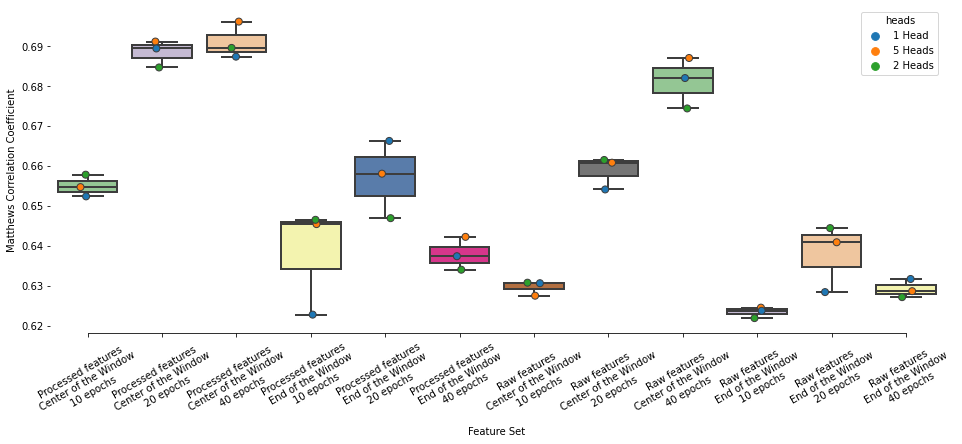

In [453]:
plt.figure(figsize=(16,6))

ax = sns.boxplot(data=df.sort_values(by="wincombfull"), y="mcc_main_y", x="wincombfull", linewidth=2, palette="Accent")
#ax = sns.swarmplot(data=df.sort_values(by="wincombfull"), y="mcc_main_y", x="wincombfull", color=".55")
sns.stripplot(x="wincombfull", y="mcc_main_y", data=df.sort_values(by="wincombfull"), 
              size=7, hue="heads", linewidth=1)

ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

# Add some transparence
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))

# Tweak the visual presentation
ax.set(ylabel="Matthews Correlation Coefficient")
ax.set(xlabel="Feature Set")
sns.despine(trim=True, left=True)


# PyCaret Results

In [467]:
#df = pd.read_csv("./ml_predictions/sleep_ml_catboost_test.csv.gz")
files = glob("./pycaret/sleep_ml_*_test.csv.gz")

dfs = []
for f in files:
    dfs.append(pd.read_csv(f))

df_pycaret = pd.concat(dfs)

df_pycaret.sort_values("MCC", ascending=False)

df_pycaret["Feature Set"] = df_pycaret["featset"].replace({"raw": "Raw", "tsfresh": "Processed"})


# MCC for ML models

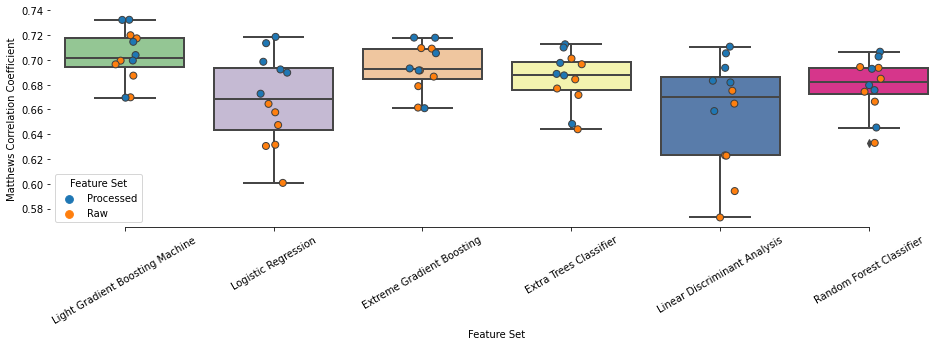

In [473]:
plt.figure(figsize=(16,4))

ax = sns.boxplot(data=df_pycaret.sort_values(by="MCC", ascending=False), y="MCC", x="Model", linewidth=2, palette="Accent")

#ax = sns.swarmplot(data=df_pycaret.sort_values(by="MCC", ascending=False), y="MCC", x="Model", color=".55")
sns.stripplot(x="Model", y="MCC", data=df_pycaret.sort_values(by="MCC", ascending=False), size=7, hue="Feature Set", linewidth=1)
#sns.stripplot(x="Model", y="MCC", data=df_pycaret.sort_values(by="MCC", ascending=False), size=7, hue="window", linewidth=1)


ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

# Add some transparence
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))

# Tweak the visual presentation
ax.set(ylabel="Matthews Correlation Coefficient")
ax.set(xlabel="Feature Set")
sns.despine(trim=True, left=True)


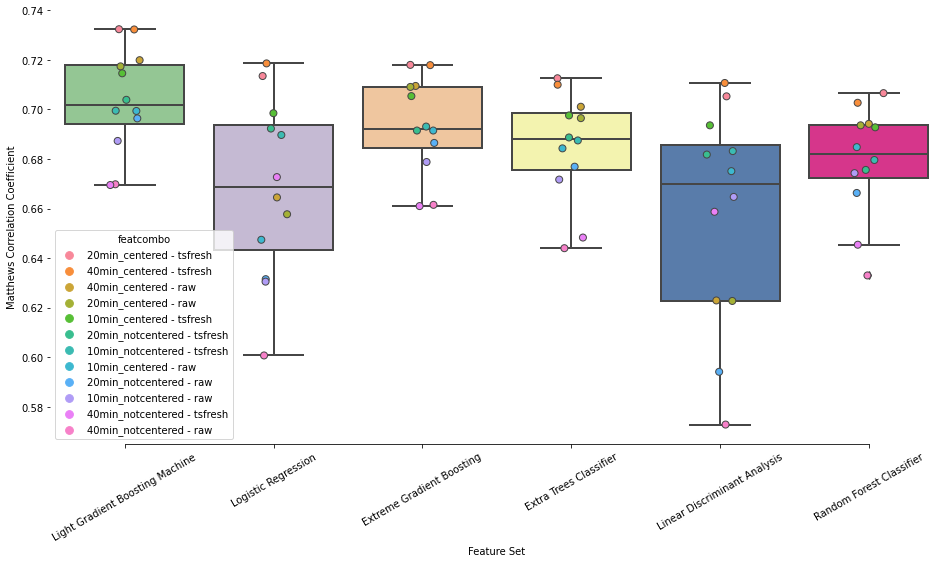

In [479]:
plt.figure(figsize=(16,8))

df_pycaret["featcombo"] = df_pycaret[["window", "featset"]].apply(lambda x: "%s - %s" % (x[0], x[1]), axis=1)

ax = sns.boxplot(data=df_pycaret.sort_values(by="MCC", ascending=False), y="MCC", x="Model", linewidth=2, palette="Accent")

#ax = sns.swarmplot(data=df_pycaret.sort_values(by="MCC", ascending=False), y="MCC", x="Model", color=".55")
sns.stripplot(x="Model", y="MCC", data=df_pycaret.sort_values(by="MCC", ascending=False), size=7, hue="featcombo", linewidth=1)
#sns.stripplot(x="Model", y="MCC", data=df_pycaret.sort_values(by="MCC", ascending=False), size=7, hue="window", linewidth=1)


ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

# Add some transparence
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))

# Tweak the visual presentation
ax.set(ylabel="Matthews Correlation Coefficient")
ax.set(xlabel="Feature Set")
sns.despine(trim=True, left=True)


# Baseline Results

In [480]:
def calculate_classification_metrics(labels, predictions):
    return metrics.accuracy_score(labels, predictions), \
           metrics.precision_score(labels, predictions), \
           metrics.recall_score(labels, predictions), \
           metrics.f1_score(labels, predictions), \
           metrics.matthews_corrcoef(labels, predictions)

In [481]:
# the results were previously calculated by using hypnospy
files = glob("../data/processed/mesa/*.csv.gz")

all_dfs = []
for f in files:
    all_dfs.append(pd.read_csv(f))

all_dfs = pd.concat(all_dfs)


In [482]:
# We might want to use other win sizes here as well
df_test = pd.read_csv("../data/processed/train_test_splits/20min_centered/test_pids_raw.csv.gz")
df_20min_centered = pd.merge(df_test, all_dfs, left_on=["pid", "gt_time"], right_on=["mesaid", "linetime"])


In [483]:
#calculate metrics

result_bs = pd.DataFrame()
result_bs['values']  = ['accuracy', 'precision', 'recall', 'f1', 'mcc']
baselines = ['SleepWindowScrippsClinic', 'SleepWindowSadeh', 'SleepWindowOakley10', 'SleepWindowColeKripke', 
             'SleepWindowSazonov', 'SleepWindowRescoredScrippsClinic', 'SleepWindowRescoredSadeh', 
             'SleepWindowRescoredOakley10', 'SleepWindowRescoredColeKripke', 'SleepWindowRescoredSazonov'
            ]

for i in baselines:
    result_bs[i] = calculate_classification_metrics(df_20min_centered['ground_truth'].astype(int),
                                                    df_20min_centered[i].astype(int))


In [484]:
result_melted = result_bs.melt(id_vars="values")
result_melted = result_melted.rename(columns={"values":"Metrics"})
result_melted["Metrics"] = result_melted["Metrics"].replace({"accuracy": "Accuracy", "mcc": "MCC",
                                                             "f1": "F1", "precision": "Precision"})
result_melted["variable"] = result_melted["variable"].replace(dict((k, k.split("SleepWindow")[1]) for k in result_melted["variable"].unique() if k.startswith("SleepWindow")))


In [486]:
df_pycaret["Model"] = df_pycaret["Model"].replace("Light Gradient Boosting Machine", "Light Gradient\nBoosting Machine")

lgbm_result = df_pycaret[(df_pycaret["model"] == "lightgbm") & 
                         (df_pycaret["window"] == "20min_centered") & 
                         (df_pycaret["featset"] == "tsfresh")                        
                        ]


best_ml = lgbm_result[["Model", "Accuracy", "MCC"]].melt(id_vars="Model").rename(columns={"Model": "variable", "variable": "Metrics"})

result_melted = pd.concat([result_melted, best_ml])

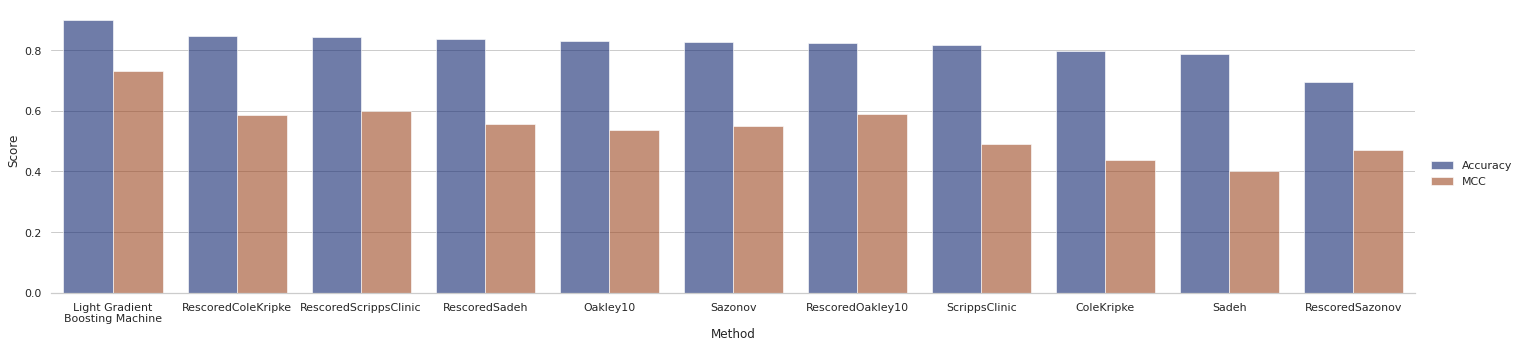

In [490]:
sns.set_theme(style="whitegrid")

result_melted = result_melted.sort_values(by="value", ascending=False)

# Seaborn
g = sns.catplot(
    data=result_melted[result_melted["Metrics"].isin(["Accuracy", "MCC"])], kind="bar",
    x="variable", y="value", hue="Metrics",
    ci="sd", palette="dark", alpha=.6, height=5, aspect=4)

g.despine(left=True)
g.set_axis_labels("Method", "Score")
g.legend.set_title("")


In [ ]:
exp = setup_experiment("../data/processed/mesa/*.csv.gz")

In [635]:

rows = [] # pd.DataFrame()
baselines = ['SleepWindowScrippsClinic', 'SleepWindowSadeh', 'SleepWindowOakley10', 'SleepWindowColeKripke', 
             'SleepWindowSazonov', 'SleepWindowRescoredScrippsClinic', 'SleepWindowRescoredSadeh', 
             'SleepWindowRescoredOakley10', 'SleepWindowRescoredColeKripke', 'SleepWindowRescoredSazonov'
            ]

# Load results
best = pd.read_csv("./pycaret/sleep_ml_lightgbm_20min_centered_tsfresh_predictions.csv.gz")
best = best.rename(columns={"Label": "LabelBestML"})
df_test = pd.read_csv("../data/processed/train_test_splits/20min_centered/test_pids_raw.csv.gz")
df_best = pd.concat([df_test, best], axis=1)
tmp = []

baselines.append("LabelBestML")

for pid in df_best["pid"].unique():

    w = exp.get_wearable(str(pid))
    df = w.data
    
    df = pd.merge(df_best, df, left_on=["gt_time", "pid"], right_on=["linetime", "mesaid"])

    
    for i in baselines:
        r = calculate_classification_metrics(df['ground_truth'].astype(int), df[i].astype(int))
        row = {"Accuracy": r[0], "Precision": r[1], "Recall": r[2], "$F_1$": r[3], "MCC": r[4], "Method": i, "PID": w.get_pid()}
        rows.append(row)

df_results = pd.DataFrame(rows)
        

/home/palotti/anaconda3/envs/sleep_boundary_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/palotti/anaconda3/envs/sleep_boundary_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/palotti/anaconda3/envs/sleep_boundary_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/palotti/anaconda3/envs/sleep_boundary_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/palotti/anaconda3/envs/sleep_boundary_env/lib/python3.8/site-packages/sklearn/metrics/_classificat

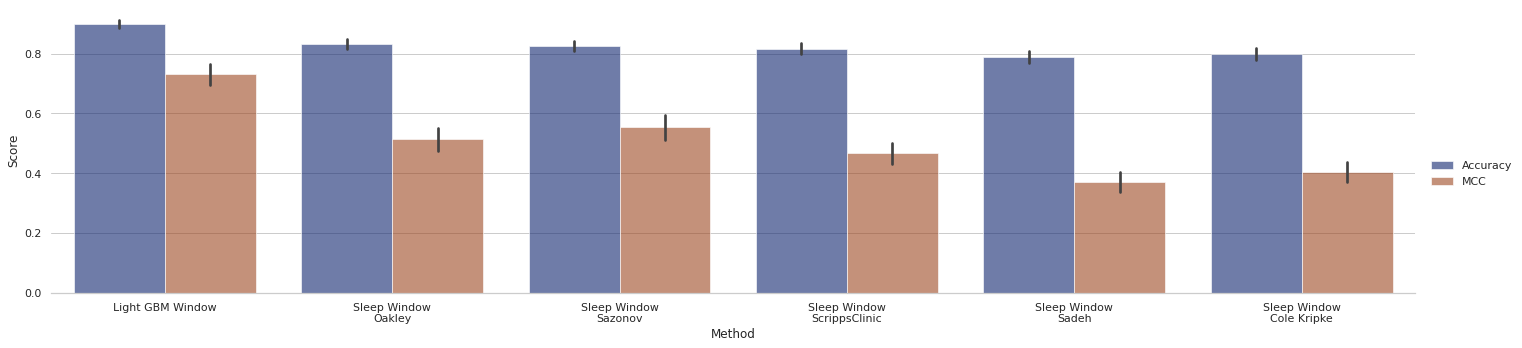

In [644]:
# To be able to add the best NN model to this figure, we also need the predictions.
sns.set_theme(style="whitegrid")

result_melted = df_results.melt(id_vars=["Method", "PID"], value_vars=["Accuracy", "Precision", "Recall", "$F_1$", "MCC"])
result_melted["Method"] = result_melted["Method"].replace({
    "SleepWindowScrippsClinic": "Sleep Window\nScrippsClinic",
    "SleepWindowSadeh": "Sleep Window\nSadeh",
    "SleepWindowOakley10": "Sleep Window\nOakley",
    "SleepWindowColeKripke": "Sleep Window\nCole Kripke",
    "SleepWindowSazonov": "Sleep Window\nSazonov",
    "SleepWindowRescoredScrippsClinic": "Sleep Window\nRescored Scripps Clinic",
    "SleepWindowRescoredSadeh": "Sleep Window\nRescored Sadeh",
    "SleepWindowRescoredOakley10": "Sleep Window\nRescored Oakley",
    "SleepWindowRescoredColeKripke": "Sleep Window\nRescored Cole Kripke",
    "SleepWindowRescoredSazonov": "Sleep Window\nRescored Sazonov",
    'LabelBestML': "Light GBM Window"
})

order = ["Light GBM Window", 
         'Sleep Window\nOakley', # 'Sleep Window\nRescored Oakley',
         'Sleep Window\nSazonov', # 'Sleep Window\nRescored Sazonov',
         'Sleep Window\nScrippsClinic', # 'Sleep Window\nRescored Scripps Clinic',
         'Sleep Window\nSadeh', # 'Sleep Window\nRescored Sadeh', 
         'Sleep Window\nCole Kripke', # 'Sleep Window\nRescored Cole Kripke',
         ]

# Seaborn
g = sns.catplot(
    data = result_melted[result_melted["variable"].isin(["Accuracy", "MCC"])], 
    kind="bar", x="Method", y="value", hue="variable", 
    #ci="sd",
    ci = 95,
    palette="dark",
    order=order,
    alpha=.6, height=5, aspect=4)

g.despine(left=True)
g.set_axis_labels("Method", "Score")
g.legend.set_title("")


# Important Figures

In [7]:
import numpy as np
import os
from tqdm import tqdm
from glob import glob
from datetime import timedelta

from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef

# Sleep boundaries
from hypnospy import Wearable, Experiment
from hypnospy.data import RawProcessing
from hypnospy.analysis import NonWearingDetector, SleepBoudaryDetector, Validator, Viewer, SleepWakeAnalysis, SleepMetrics


In [8]:
def setup_experiment(file_path, start_hour=15):
    # Configure an Experiment
    exp = Experiment()

    # Iterates over a set of files in a directory.
    # Unfortunately, we have to do it manually with RawProcessing because we are modifying the annotations
    for file in glob(file_path):
        pp = RawProcessing(file,
                           # HR information
                           col_for_hr="mean_hr",
                           # Activity information
                           cols_for_activity=["activity"],
                           # Datetime information
                           col_for_datetime="linetime",
                           strftime="%Y-%m-%d %H:%M:%S",
                           # Participant information
                           col_for_pid="mesaid")

        w = Wearable(pp)  # Creates a wearable from a pp object
        # Invert the two_stages flag. Now True means sleeping and False means awake
        w.data["sleep"] = (w.data["stages"] > 0)
        
        exp.add_wearable(w)
        exp.set_freq_in_secs(30)
        w.change_start_hour_for_experiment_day(start_hour)

    return exp

In [9]:
# Problem Setting
exp = setup_experiment("../data/processed/mesa/*.csv.gz")

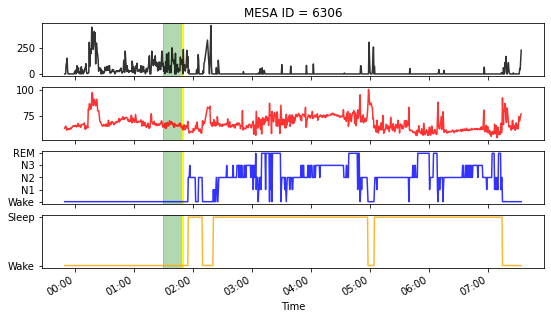

In [183]:
df = (exp.get_all_wearables()[45]).data

df["linetime"] = pd.to_datetime(df["linetime"] )

fig, axes = plt.subplots(4, 1)

df.set_index("linetime")["activity"].plot(figsize=(9, 5), ax=axes[0], color="black", alpha=0.8)
df.set_index("linetime")["mean_hr"].plot(figsize=(9, 5), ax=axes[1], color="red", alpha=0.8)
df.set_index("linetime")["stages"].plot(figsize=(9, 5), ax=axes[2], color="blue", alpha=0.8)
df.set_index("linetime")["ground_truth"].astype(int).plot(figsize=(9, 5), ax=axes[3], color="orange", alpha=0.8)

axes[0].set_xlabel(None); axes[1].set_xlabel(None); axes[2].set_xlabel(None); axes[3].set_xlabel(None)

axes[0].set(xticklabels=[]); axes[1].set(xticklabels=[]); axes[2].set(xticklabels=[])
axes[2].set_yticks([0,1,2,3,4]); axes[2].set(yticklabels=["Wake", "N1", "N2", "N3", "REM"])
axes[3].set_yticks([0,1]); axes[3].set(yticklabels=["Wake", "Sleep"])

mesaid = df["mesaid"].unique()[0]; axes[0].set_title("MESA ID = %d" % mesaid)

date_form = DateFormatter("%H:%M"); axes[3].xaxis.set_major_formatter(date_form); axes[3].set_xlabel("Time")


# How we extracted the ground truth using a window approach
start = 200
gap = 40
for a in axes:
    a.axvspan(df["linetime"].iloc[start], df["linetime"].iloc[start+gap], alpha=0.3, color='green')
    #a.axvspan(df["linetime"].iloc[start+gap//2], df["linetime"].iloc[start+gap//2+1], alpha=0.9, color='yellow')
    a.axvspan(df["linetime"].iloc[start+gap-2], df["linetime"].iloc[start+gap], alpha=0.9, color='yellow')



In [212]:
df_concat[df_concat["pid"] == 288]

,Unnamed: 0,pid,gt_time,Unnamed: 0,LabelBestML,Score
4626,4626,288,2017-01-03 23:10:00,4626,False,0.8546
4627,4627,288,2017-01-03 23:10:30,4627,False,0.8112
4628,4628,288,2017-01-03 23:11:00,4628,False,0.7833
4629,4629,288,2017-01-03 23:11:30,4629,False,0.8121
4630,4630,288,2017-01-03 23:12:00,4630,False,0.7985
...,...,...,...,...,...,...
5554,5554,288,2017-01-04 06:54:00,5554,True,0.8395
5555,5555,288,2017-01-04 06:54:30,5555,True,0.6638
5556,5556,288,2017-01-04 06:55:00,5556,True,0.6307
5557,5557,288,2017-01-04 06:55:30,5557,True,0.5200


Text(0.5, 0, 'Time')

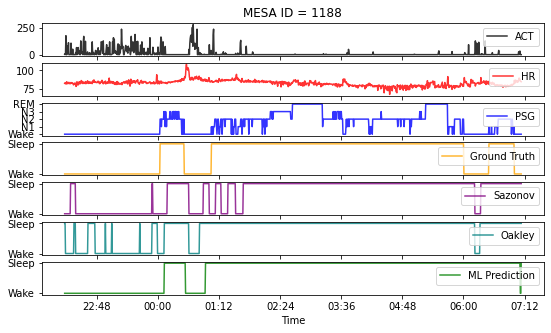

In [282]:
import matplotlib.dates as mdates
#Baseline image
#df = (exp.get_all_wearables()[45]).data
pid = 1188
df = exp.get_wearable("%s" % pid).data
df["linetime"] = pd.to_datetime(df["linetime"] )

# Load results
best = pd.read_csv("./pycaret/sleep_ml_lightgbm_20min_centered_tsfresh_predictions.csv.gz")
best = best.rename(columns={"Label": "LabelBestML"})
df_test = pd.read_csv("../data/processed/train_test_splits/20min_centered/test_pids_raw.csv.gz")
df_concat = pd.concat([df_test, best], axis=1)

# df_test["pid"].unique() # 
df_concat["gt_time"] = pd.to_datetime(df_concat["gt_time"])
df = pd.merge(df, df_concat[df_concat["pid"] == pid], left_on="linetime", right_on="gt_time")

fig, axes = plt.subplots(7, 1)

df = df.set_index("gt_time")
df.index = mdates.date2num(df.index)

df["activity"].plot(figsize=(9, 5), ax=axes[0], color="black", alpha=0.8, label="ACT")
df["mean_hr"].plot(figsize=(9, 5), ax=axes[1], color="red", alpha=0.8, label="HR")
df["stages"].plot(figsize=(9, 5), ax=axes[2], color="blue", alpha=0.8, label="PSG")
df["ground_truth"].astype(int).plot(figsize=(9, 5), ax=axes[3], color="orange", alpha=0.8, label="Ground Truth")
df["SleepWindowSazonov"].astype(int).plot(figsize=(9, 5), ax=axes[4], color="purple", alpha=0.8, label="Sazonov")
df["SleepWindowOakley10"].astype(int).plot(figsize=(9, 5), ax=axes[5], color="teal", alpha=0.8, label="Oakley")
df["LabelBestML"].astype(int).plot(figsize=(9, 5), ax=axes[6], color="green", alpha=0.8, label="ML Prediction")

axes[0].set_xlabel(None); axes[1].set_xlabel(None); axes[2].set_xlabel(None); axes[3].set_xlabel(None)

axes[0].set(xticklabels=[]); axes[1].set(xticklabels=[]); axes[2].set(xticklabels=[])
axes[2].set_yticks([0,1,2,3,4]); axes[2].set(yticklabels=["Wake", "N1", "N2", "N3", "REM"])
for i in [3,4,5,6]:
    axes[i].set_yticks([0,1]); axes[i].set(yticklabels=["Wake", "Sleep"])

for a in axes:
    a.legend(loc="upper right")

mesaid = df["mesaid"].unique()[0]; axes[0].set_title("MESA ID = %d" % mesaid)

date_form = DateFormatter("%H:%M"); axes[-1].xaxis.set_major_formatter(date_form); axes[-1].set_xlabel("Time")

# Interesting ones 1150


# Consequencies of using our sleep win algorithm

In [539]:
def evaluate_awakenings():
    exp = setup_experiment("../data/processed/mesa/*.csv.gz")
    
    # Load results
    best = pd.read_csv("./pycaret/sleep_ml_lightgbm_20min_centered_tsfresh_predictions.csv.gz")
    best = best.rename(columns={"Label": "LabelBestML"})
    df_test = pd.read_csv("../data/processed/train_test_splits/20min_centered/test_pids_raw.csv.gz")
    df_best = pd.concat([df_test, best], axis=1)
    tmp = []
    
    for pid in df_best["pid"].unique():

        w = exp.get_wearable(str(pid))

        # This will append the ML information to the result
        w.data = pd.merge(df_best, w.data, left_on=["gt_time", "pid"], right_on=["linetime", "mesaid"])

        for alg in ["ScrippsClinic", "Oakley10", "Sazonov"]:

            sm = SleepMetrics(w)
            # Get AW
            df_sm = sm.get_sleep_quality("awakenings", wake_sleep_col="sleep", ignore_awakenings_smaller_than_X_minutes=5,
                                         outputname="AW", normalize_per_hour=False)
            df_sm["Alg"] = "ExpectedValue"
            # tmp.append(df_sm)
            
            expected_value = df_sm["AW"].values[0]

#             df_sm = sm.get_sleep_quality("awakenings", wake_sleep_col=alg, ignore_awakenings_smaller_than_X_minutes=5, 
#                                          outputname= "AW", normalize_per_hour=False)
#             df_sm["Alg"] = alg
#             df_sm["AW"] = df_sm["AW"] - expected_value
#             tmp.append(df_sm)

            df_sm = sm.get_sleep_quality("awakenings", wake_sleep_col="SleepWindow"+alg, ignore_awakenings_smaller_than_X_minutes=5, 
                                         outputname= "AW", normalize_per_hour=False)
            df_sm["Alg"] = alg + "Window"
            df_sm["AW"] = df_sm["AW"] - expected_value
            tmp.append(df_sm)

            df_sm = sm.get_sleep_quality("awakenings", wake_sleep_col="LabelBestML", ignore_awakenings_smaller_than_X_minutes=5, 
                                         outputname= "AW", normalize_per_hour=False)
            df_sm["Alg"] = alg + "\nWith LBGM Window"
            df_sm["AW"] = df_sm["AW"] - expected_value
            tmp.append(df_sm)
            
    return pd.concat(tmp)



(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'ScrippsClinic\nSelf Window'),
  Text(1, 0, 'ScrippsClinic\nWith LBGM Window'),
  Text(2, 0, 'Oakley\nSelf Window'),
  Text(3, 0, 'Oakley10\nWith LBGM Window'),
  Text(4, 0, 'SazonovWindow'),
  Text(5, 0, 'Sazonov\nWith LBGM Window')])

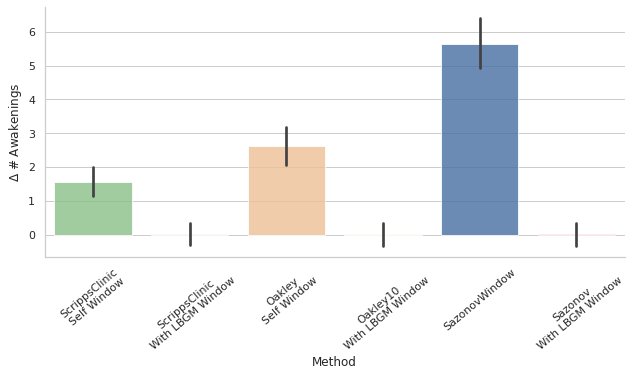

In [542]:
#results_aw = evaluate_awakenings()

results_aw["$\Delta$ # Awakenings"] = results_aw["AW"] 
results_aw["# Awakenings"] = results_aw["AW"] 
results_aw["Alg"] = results_aw["Alg"].replace({"ScrippsClinicWindow": "ScrippsClinic\nSelf Window",
                                               "Oakley10Window": "Oakley\nSelf Window",
                                               "ColeKripkeWindow": "Cole Kripke\nSelf Window",
                                              }) 
results_aw["Method"] = results_aw["Alg"] 

g = sns.catplot(
    data=results_aw, kind="bar", x="Method", y="$\Delta$ # Awakenings", 
    palette="Accent", alpha=.8, height=4.5, aspect=2)

plt.xticks(rotation = 40)


In [543]:
def evaluate_sleeplatency():
    exp = setup_experiment("../data/processed/mesa/*.csv.gz")
    
    # Load results
    best = pd.read_csv("./pycaret/sleep_ml_lightgbm_20min_centered_tsfresh_predictions.csv.gz")
    best = best.rename(columns={"Label": "LabelBestML"})
    df_test = pd.read_csv("../data/processed/train_test_splits/20min_centered/test_pids_raw.csv.gz")
    df_best = pd.concat([df_test, best], axis=1)
    tmp = []
    
    for pid in df_best["pid"].unique():

        w = exp.get_wearable(str(pid))

        # This will append the ML information to the result
        w.data = pd.merge(df_best, w.data, left_on=["gt_time", "pid"], right_on=["linetime", "mesaid"])

        for alg in ["ScrippsClinic", "Oakley10", "ColeKripke"]:

            sm = SleepMetrics(w)
            # Get AW
            df_sm = sm.get_sleep_quality("sleeplatency", wake_sleep_col="sleep",
                                         ignore_awakenings_smaller_than_X_minutes=5, outputname="SL")
            df_sm["Alg"] = "ExpectedValue"
            #tmp.append(df_sm)
            expected_value = df_sm["SL"].values[0]

            df_sm = sm.get_sleep_quality("sleeplatency", wake_sleep_col=alg, outputname= "SL")
            df_sm["Alg"] = alg
            df_sm["SL"] = df_sm["SL"] - expected_value
            tmp.append(df_sm)

            df_sm = sm.get_sleep_quality("sleeplatency", wake_sleep_col="SleepWindow"+alg,
                                         ignore_awakenings_smaller_than_X_minutes=5, 
                                         outputname= "SL")
            df_sm["Alg"] = alg + "Window"
            df_sm["SL"] = df_sm["SL"] - expected_value
            tmp.append(df_sm)

            df_sm = sm.get_sleep_quality("sleeplatency", wake_sleep_col="LabelBestML",
                                         ignore_awakenings_smaller_than_X_minutes=5, 
                                         outputname= "SL")
            df_sm["Alg"] = "LBGM Window"
            df_sm["SL"] = df_sm["SL"] - expected_value
            tmp.append(df_sm)
            
    return pd.concat(tmp)


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Raw Scripps Clinic'),
  Text(1, 0, 'ScrippsClinic\nSelf Window'),
  Text(2, 0, 'LBGM Window'),
  Text(3, 0, 'Raw Oakley'),
  Text(4, 0, 'Oakley\nSelf Window'),
  Text(5, 0, 'Raw Cole Kripke'),
  Text(6, 0, 'Cole Kripke\nSelf Window')])

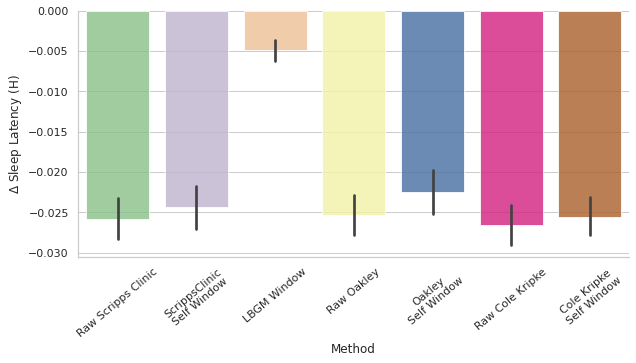

In [562]:
#results_sl = evaluate_sleeplatency()
results_sl["$\Delta$ Sleep Latency (H)"] = results_sl["SL"] / 60 
results_sl["Alg"] = results_sl["Alg"].replace({"ScrippsClinic": "Raw Scripps Clinic",
                                               "ScrippsClinicWindow": "ScrippsClinic\nSelf Window",
                                               "Oakley10": "Raw Oakley",
                                               "Oakley10Window": "Oakley\nSelf Window",
                                               "ColeKripke": "Raw Cole Kripke",
                                               "ColeKripkeWindow": "Cole Kripke\nSelf Window",
                                              }) 
results_sl["Method"] = results_sl["Alg"] 

g = sns.catplot(
    data=results_sl, kind="bar", x="Method", y="$\Delta$ Sleep Latency (H)",
    palette="Accent", alpha=.8, height=4.5, aspect=2)

plt.xticks(rotation = 40)


In [550]:
def evaluate_TST():
    exp = setup_experiment("../data/processed/mesa/*.csv.gz")
    
    # Load results
    best = pd.read_csv("./pycaret/sleep_ml_lightgbm_20min_centered_tsfresh_predictions.csv.gz")
    best = best.rename(columns={"Label": "LabelBestML"})
    df_test = pd.read_csv("../data/processed/train_test_splits/20min_centered/test_pids_raw.csv.gz")
    df_best = pd.concat([df_test, best], axis=1)
    tmp = []
    
    for pid in df_best["pid"].unique():

        w = exp.get_wearable(str(pid))

        # This will append the ML information to the result
        w.data = pd.merge(df_best, w.data, left_on=["gt_time", "pid"], right_on=["linetime", "mesaid"])

        for alg in ["ScrippsClinic", "Oakley10", "ColeKripke"]:

            # Get the ground truth for TST
            sm = SleepMetrics(w)
            df_sm = sm.get_sleep_quality("totalSleepTime", wake_sleep_col="sleep", outputname="TST", normalize_per_hour=False)
            df_sm["Alg"] = "ExpectedValue"
            #tmp.append(df_sm)
            expected_value = df_sm["TST"].values[0]

            # Get the TST for some sleep formula
            df_sm = sm.get_sleep_quality("totalSleepTime", wake_sleep_col=alg, outputname= "TST", normalize_per_hour=False)
            df_sm["Alg"] = alg
            df_sm["TST"] = df_sm["TST"] - expected_value
            tmp.append(df_sm)

            # Get the TST for the window on top of an sleep formula
            df_sm = sm.get_sleep_quality("totalSleepTime", wake_sleep_col=alg, 
                                         sleep_period_col="SleepWindow"+alg,
                                         outputname= "TST", normalize_per_hour=False)
            df_sm["Alg"] = alg + "Window"
            
            df_sm["TST"] = df_sm["TST"] - expected_value
            tmp.append(df_sm)
            
            # Get the TST for our machine learning window
            df_sm = sm.get_sleep_quality("totalSleepTime", wake_sleep_col=alg,
                                         sleep_period_col="LabelBestML", 
                                         outputname= "TST", normalize_per_hour=False)
            df_sm["Alg"] = alg + "\nWith LBGM Window"
            
            df_sm["TST"] = df_sm["TST"] - expected_value
            tmp.append(df_sm)

    return pd.concat(tmp)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Raw Scripps Clinic'),
  Text(1, 0, 'ScrippsClinic\nSelf Window'),
  Text(2, 0, 'ScrippsClinic\nWith LBGM Window'),
  Text(3, 0, 'Raw Oakley'),
  Text(4, 0, 'Oakley\nSelf Window'),
  Text(5, 0, 'Oakley10\nWith LBGM Window'),
  Text(6, 0, 'Raw Cole Kripke'),
  Text(7, 0, 'Cole Kripke\nSelf Window'),
  Text(8, 0, 'ColeKripke\nWith LBGM Window')])

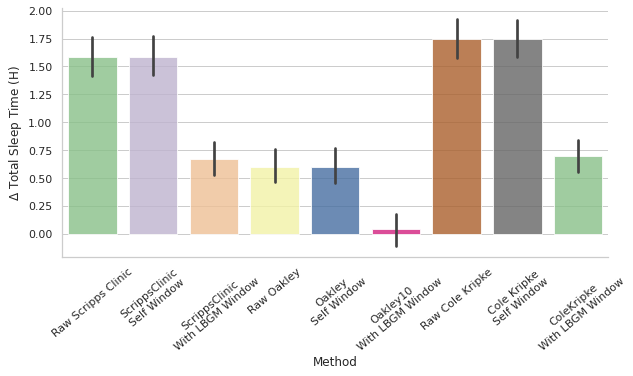

In [564]:
#results_tst = evaluate_TST()
results_tst["$\Delta$ Total Sleep Time (H)"] = results_tst["TST"]
results_tst["Alg"] = results_tst["Alg"].replace({"ScrippsClinic": "Raw Scripps Clinic",
                                                 "ScrippsClinicWindow": "ScrippsClinic\nSelf Window",
                                                 "Oakley10": "Raw Oakley",
                                                 "Oakley10Window": "Oakley\nSelf Window",
                                                 "ColeKripke": "Raw Cole Kripke",
                                                 "ColeKripkeWindow": "Cole Kripke\nSelf Window",
                                              }) 
results_tst["Method"] = results_tst["Alg"] 


g = sns.catplot(
    data=results_tst, kind="bar", x="Method", y="$\Delta$ Total Sleep Time (H)", 
    palette="Accent", alpha=.8, height=4.5, aspect=2)

plt.xticks(rotation = 40)


In [554]:
def evaluate_sleepefficiency():
    exp = setup_experiment("../data/processed/mesa/*.csv.gz")
    
    # Load results
    best = pd.read_csv("./pycaret/sleep_ml_lightgbm_20min_centered_tsfresh_predictions.csv.gz")
    best = best.rename(columns={"Label": "LabelBestML"})
    df_test = pd.read_csv("../data/processed/train_test_splits/20min_centered/test_pids_raw.csv.gz")
    df_best = pd.concat([df_test, best], axis=1)
    tmp = []
    
    for pid in df_best["pid"].unique():

        w = exp.get_wearable(str(pid))

        # This will append the ML information to the result
        w.data = pd.merge(df_best, w.data, left_on=["gt_time", "pid"], right_on=["linetime", "mesaid"])

        for alg in ["ScrippsClinic", "Oakley10", "ColeKripke"]:

            sm = SleepMetrics(w)
            # Get AW
            df_sm = sm.get_sleep_quality("sleepefficiency", wake_sleep_col="sleep",
                                         # ignore_awakenings_smaller_than_X_minutes=5,
                                         outputname="SE")
            df_sm["Alg"] = "ExpectedValue"
            #tmp.append(df_sm)
            expected_value = df_sm["SE"].values[0]

            df_sm = sm.get_sleep_quality("sleepefficiency", wake_sleep_col=alg, outputname= "SE")
            df_sm["Alg"] = alg
            df_sm["SE"] = df_sm["SE"] - expected_value
            tmp.append(df_sm)

            df_sm = sm.get_sleep_quality("sleepefficiency", wake_sleep_col="SleepWindow"+alg,
                                         #ignore_awakenings_smaller_than_X_minutes=5, 
                                         outputname= "SE")
            df_sm["Alg"] = alg + "Window"
            df_sm["SE"] = df_sm["SE"] - expected_value
            tmp.append(df_sm)

            df_sm = sm.get_sleep_quality("sleepefficiency", wake_sleep_col="LabelBestML",
                                         #ignore_awakenings_smaller_than_X_minutes=5, 
                                         outputname= "SE")
            df_sm["Alg"] = alg + "\nWith LBGM Window"
            df_sm["SE"] = df_sm["SE"] - expected_value
            tmp.append(df_sm)
            
    return pd.concat(tmp)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Raw Scripps Clinic'),
  Text(1, 0, 'ScrippsClinic\nSelf Window'),
  Text(2, 0, 'ScrippsClinic\nWith LBGM Window'),
  Text(3, 0, 'Raw Oakley'),
  Text(4, 0, 'Oakley\nSelf Window'),
  Text(5, 0, 'Oakley10\nWith LBGM Window'),
  Text(6, 0, 'Raw Cole Kripke'),
  Text(7, 0, 'Cole Kripke\nSelf Window'),
  Text(8, 0, 'ColeKripke\nWith LBGM Window')])

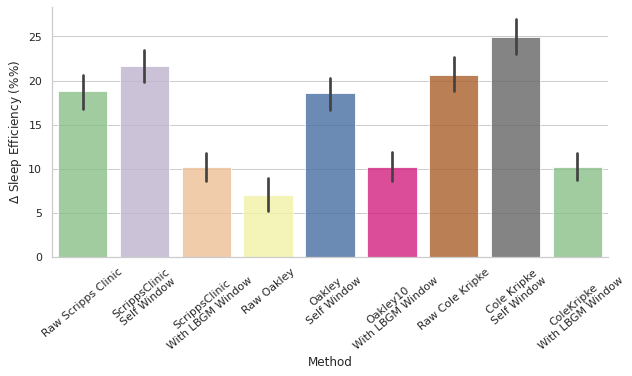

In [567]:
#results_ef = evaluate_sleepefficiency()
results_ef["$\Delta$ Sleep Efficiency (%%)"] = results_ef["SE"]
results_ef["Method"] = results_ef["Alg"] 

results_ef["Alg"] = results_ef["Alg"].replace({"ScrippsClinic": "Raw Scripps Clinic",
                                                 "ScrippsClinicWindow": "ScrippsClinic\nSelf Window",
                                                 "Oakley10": "Raw Oakley",
                                                 "Oakley10Window": "Oakley\nSelf Window",
                                                 "ColeKripke": "Raw Cole Kripke",
                                                 "ColeKripkeWindow": "Cole Kripke\nSelf Window",
                                              }) 
results_ef["Method"] = results_ef["Alg"] 

g = sns.catplot(
    data=results_ef, kind="bar", x="Method", y="$\Delta$ Sleep Efficiency (%%)", 
    palette="Accent", alpha=.8, height=4.5, aspect=2)


plt.xticks(rotation = 40)


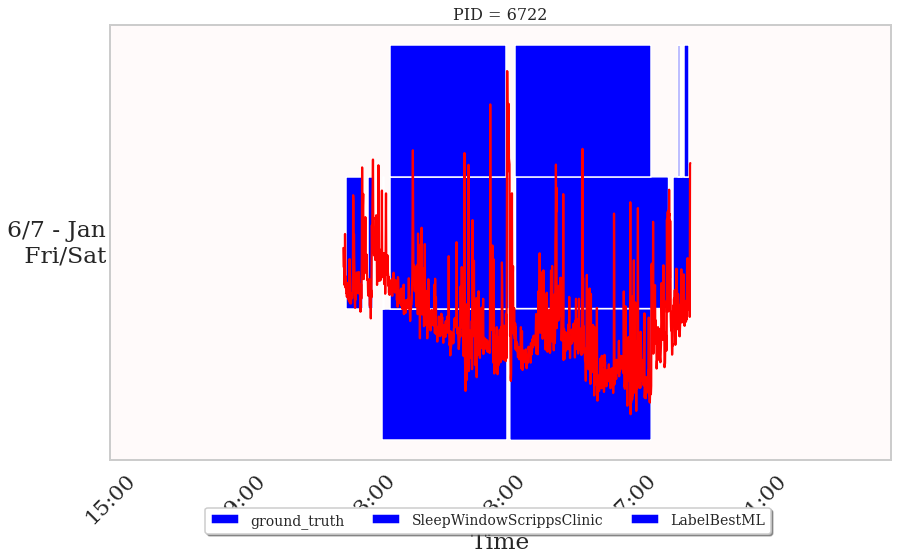

[<Figure size 1008x576 with 2 Axes>]

In [289]:
v = Viewer(w)
v.view_signals(signal_categories=["hr"],
               signal_as_area=["ground_truth", "SleepWindowScrippsClinic", "LabelBestML"],
               alphas={'ground_truth': 0.3, "SleepWindowScrippsClinic": 0.2, "LabelBestML": 0.4},
               colors=["r", "b", "g"]
               )


In [ ]:
# TODOs:
# -> Explaining the experimentation settings (how we made the ground truth)
# ---> Visual explanation that compares what are the various windows that we can have with sleep formulas and what we are predicting
# ------------
# -> Writing the ML methodology
# -> Writing the results

# What can we do extra:
# -> Validate the experiments on another dataset (Apple data from Olivia Walch, only >20 subjects)
# -> "Fixing" sleep formulas to deal with missing data

